## Problem Statement : 
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, they have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
-	Which variables are significant in predicting the demand for shared bikes.
-	How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal: 
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

## Data Loading & understanding

In [4]:
df = pd.read_csv("day.csv")

In [5]:
df.shape

(730, 16)

In [6]:
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
496,497,12-05-2019,2,1,5,0,6,0,1,23.130847,27.24085,48.0417,8.249911,2622,4807,7429
312,313,09-11-2018,4,0,11,0,3,1,1,16.400000,20.45395,75.8333,4.167119,305,3804,4109
487,488,03-05-2019,2,1,5,0,4,1,2,22.960000,26.86210,76.8333,8.957632,764,5657,6421
636,637,29-09-2019,4,1,9,0,6,0,1,22.242500,26.51480,54.2917,15.249468,2589,5966,8555
587,588,11-08-2019,3,1,8,0,6,0,2,28.392500,31.91335,73.2917,13.834093,2247,4052,6299


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


From the above we see that there are no outliers (min/max values seem fine).. mean & median are approximately same

## Data Preparation

##### copying the given dataset characteristics for easy reference

*
Dataset characteristic : 	
day.csv have the following fiels:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

#### Deleting the columns not useful for analysis

 - As we have to analyze the total users (indicated by the 'cnt' col), rather than analyzing the 'casual' & 'registered' users separately, we can drop these columns.
 - dteday : date (has the dates for all the days starting from 1st jan,2018 till 31st dec, 2019 i.e. 2 * 365 = 730 dates). All the info required from dteday has been captured in other columns like 'yr', 'mnth', 'weekday' etc.
 - Also from the description, instant is just the record index and doesn't contribute to our analysis. Lets drop this column too.

In [9]:
cols2_drop = ['casual', 'registered', 'dteday', 'instant']
df.drop(columns = cols2_drop, inplace = True)

In [10]:
# From the description of the columns, it seems 'temp' & 'atemp' may be higly correlated as both signify temperature conditions. Let's check that :
df['temp'].corr(df['atemp'])

0.991696178690565

In [11]:
# As temp & atemp are highly correlated, lets drop one of them (atemp).
cols2_drop = ['atemp']
df.drop(columns = cols2_drop, inplace = True)

In [12]:
df.sample(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
684,4,1,11,0,5,1,1,14.145,52.4583,11.458675,5698
459,2,1,4,0,4,1,1,17.835,37.4167,14.708443,6457
545,3,1,6,0,6,0,1,31.365,60.1250,10.791757,5687


#### Check the unique values of the categorical columns

In [13]:
# As the data-set is not big, we can look at the unique values of different columns to understand the data better
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in cat_cols:
    print(i, ":", df[i].unique())

season : [1 2 3 4]
yr : [0 1]
mnth : [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday : [0 1]
weekday : [6 0 1 2 3 4 5]
workingday : [0 1]
weathersit : [2 1 3]


#### Analyzing columns with categorical variables

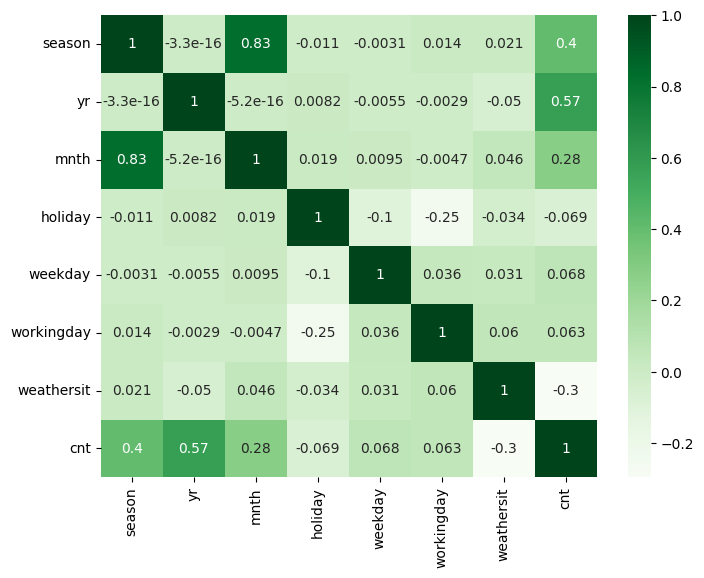

In [14]:
cols = cat_cols + ['cnt']
plt.figure(figsize=(8,6))
sns.heatmap(df[cols].corr(), cmap='Greens', annot=True)
plt.show()

__Observation : The season, year, month & weathersit have the most impact on the target variable. This can be observed from  their correlation values with the ‘cnt’.__

#### Converting to categorical string values

In [15]:
# check the day on the first day i.e. '01 01 2018'
import datetime 
import calendar 

def findDay(date): 
    born = datetime.datetime.strptime(date, '%d %m %Y').weekday() 
    return (calendar.day_name[born]) 
  
# Driver program 
date = '01 01 2018'
print(findDay(date)) 

Monday


In [16]:
# from the unique value count, the categorical variables 'season', 'mnth', 'weekday', 'weathersit' have more than two values. 
# And as they don't have any order to them, lets convert them to string values first.

season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
mnth   = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
weekday= {0: 'Tues', 1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon'}
weathersit = {1:'clear', 2:'cloudy', 3:'light-rain'}

df['season'] = df['season'].replace(season)
df['mnth'] = df['mnth'].replace(mnth)
df['weekday'] = df['weekday'].replace(weekday)
df['weathersit'] = df['weathersit'].replace(weathersit)

In [17]:
df.sample(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
199,fall,0,Jul,0,Thurs,1,clear,31.843347,65.0417,8.750200,4541
332,winter,0,Nov,0,Thurs,1,cloudy,18.791653,83.0833,17.292164,2914
516,summer,1,Jun,0,Sun,1,cloudy,26.820847,75.5417,15.916721,4127


#### Data Visualisation

##### Lets first analyze the impact of categorical variables on the target variable using barplots & boxplots

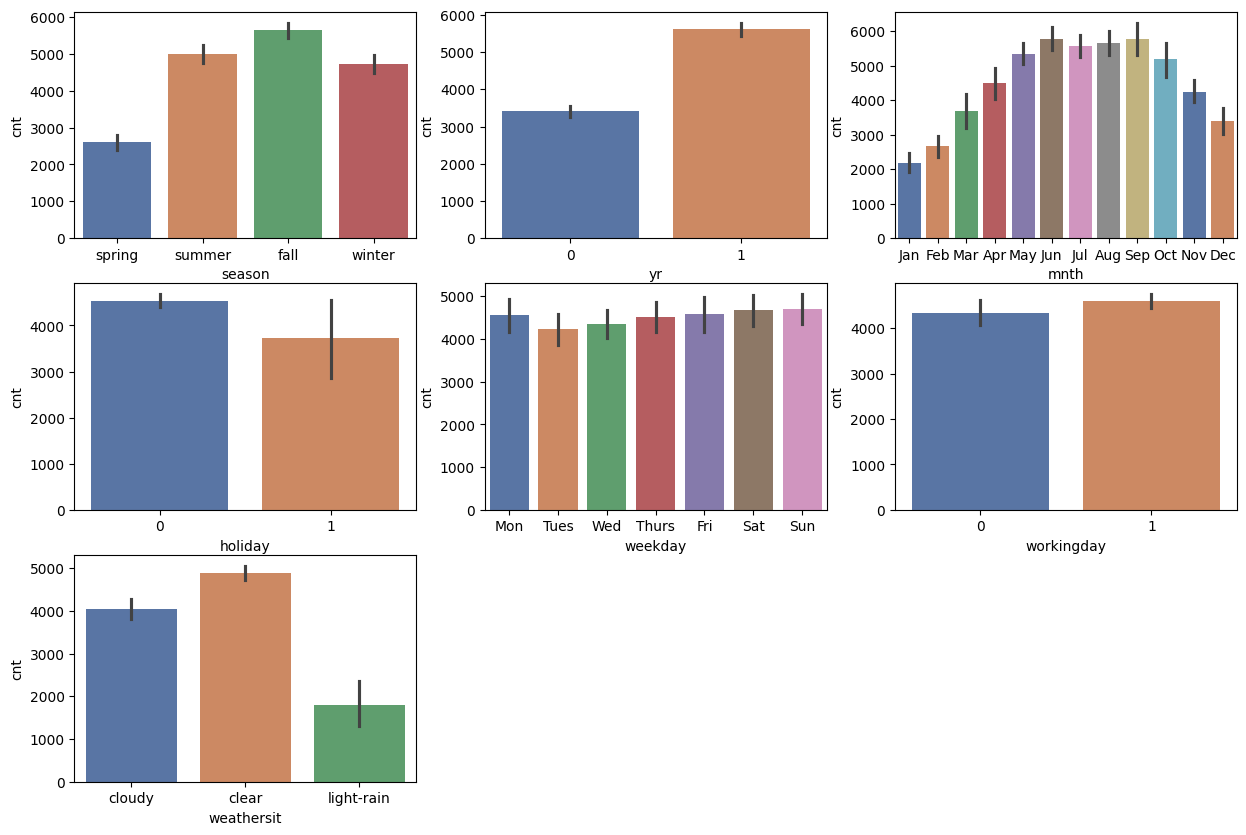

In [18]:
plt.figure(figsize=(15,10))
for i in range(len(cat_cols)):
    plt.subplot(3,3,i+1)
    sns.barplot(data=df, x=cat_cols[i], y='cnt', estimator=np.mean, palette='deep')

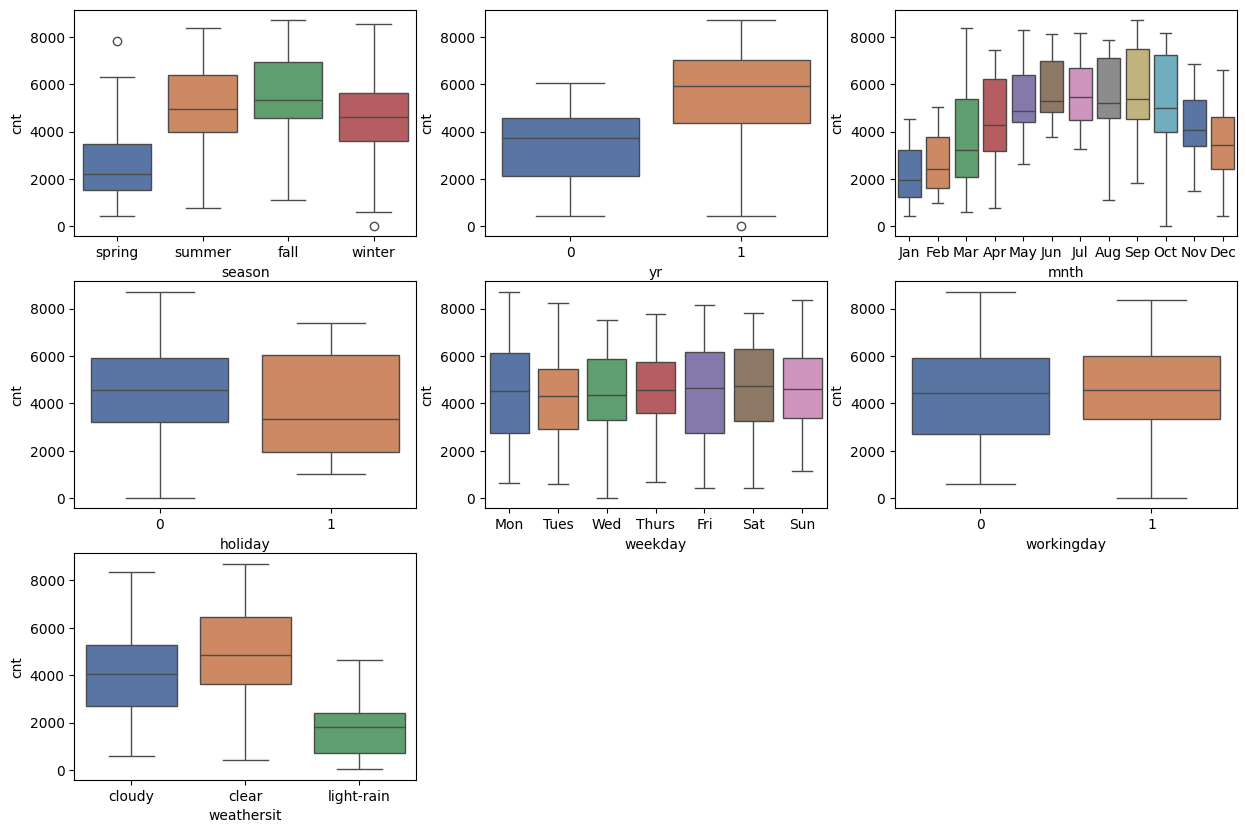

In [19]:
plt.figure(figsize=(15,10))
for i in range(len(cat_cols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df, x=cat_cols[i], y='cnt', palette='deep')

__Observation : The season, year, month & weathersit have the most impact on the target variable. This can be observed from  their barplots as well as boxplots with the ‘cnt’.__

##### Lets next analyze the impact of numeric variables on the target variable using scatterplots

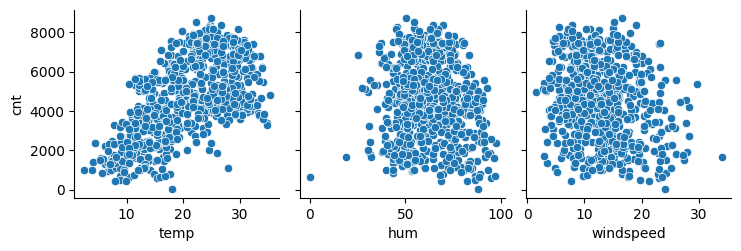

In [20]:
num_cols = ['temp', 'hum', 'windspeed']
sns.pairplot(data=df, x_vars=num_cols, y_vars='cnt', palette='deep')
plt.show()

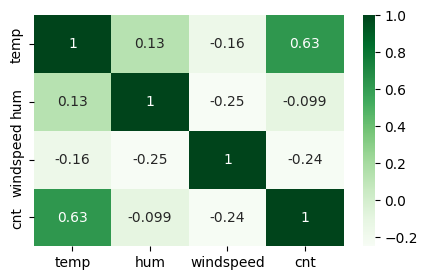

In [21]:
cols = num_cols + ['cnt']
plt.figure(figsize=(5,3))
sns.heatmap(df[cols].corr(), cmap='Greens', annot=True)
plt.show()

__Observation : Among the numeric columns, temp & windspeed have the most impact on the target variable.__

#### Creating dummy variables

In [22]:
df.shape

(730, 11)

In [23]:
dummy_cols = ['season', 'mnth', 'weekday', 'weathersit']
df1 = pd.get_dummies(df, columns=dummy_cols, drop_first=True, dtype='u1')

In [24]:
df1.shape

(730, 29)

In [25]:
df1.sample(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_cloudy,weathersit_light-rain
433,1,0,0,11.787500,35.0417,15.125250,4118,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
403,1,0,1,10.523347,72.2917,8.959307,2802,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
177,0,0,1,27.982500,65.8333,7.208396,4708,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0


## Building a Linear Regression Model

#### Divide the data to train & test

In [26]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df1, train_size = 0.7, random_state = 100)

In [27]:
print(df_train.shape, df_test.shape)

(510, 29) (220, 29)


#### Scaling the data 

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# Apply scaler() to all the columns except the ones having binary values
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
sc.fit(df_train[num_vars])
df_train[num_vars] = sc.transform(df_train[num_vars])

# let us also scale the test data which will be requied later for model evaluation
df_test[num_vars] = sc.transform(df_test[num_vars])

In [29]:
df_train[num_vars].head(3)

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096


In [30]:
df_test[num_vars].head(3)

,temp,hum,windspeed,cnt
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382


#### Dividing the data into X and y

In [31]:
x_train = df_train.drop(columns=['cnt'])
y_train = df_train['cnt']

In [32]:
x_train.head(2)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_cloudy,weathersit_light-rain
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [33]:
y_train.head(2)

576    0.827658
426    0.465255
Name: cnt, dtype: float64

#### Writing generic functions for LR model creation & VIF's

In [34]:
import statsmodels.api as sm

# a function to build a linear regression model for a given X,y
def build_lr_model(x_train, y_train):
    # add a constant
    x_trainc = sm.add_constant(x_train)

    # Build a LR model
    lr_model = sm.OLS(y_train, x_trainc)
    lr = lr_model.fit()
    return lr   

In [35]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def print_vifs(x_train):
    vif = pd.DataFrame()
    vif['Features'] = x_train.columns
    vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### Iteration 1 : Checking the Regression results with all the variables
LR model with all the variables will act as a base model against which we can compare say the drop in R-sq and other params.

In [36]:
lr = build_lr_model(x_train, y_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.00e-181
Time:                        14:33:40   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [37]:
print_vifs(x_train)  

                 Features    VIF
2              workingday  86.77
20            weekday_Mon  19.71
24           weekday_Tues  18.34
6           season_spring  10.75
8           season_winter   9.44
7           season_summer   8.27
3                    temp   7.08
17               mnth_Nov   6.79
18               mnth_Oct   6.47
9                mnth_Aug   6.36
12               mnth_Jan   5.90
10               mnth_Dec   5.68
13               mnth_Jul   5.60
19               mnth_Sep   4.90
1                 holiday   4.59
11               mnth_Feb   4.39
15               mnth_Mar   3.47
14               mnth_Jun   2.81
16               mnth_May   2.22
4                     hum   2.05
25            weekday_Wed   1.78
21            weekday_Sat   1.62
22            weekday_Sun   1.61
23          weekday_Thurs   1.61
26      weathersit_cloudy   1.60
27  weathersit_light-rain   1.29
5               windspeed   1.24
0                      yr   1.06


#### Using RFE
As seen in the above base model, we have variables with high p-value & high vif's. So we need an automatic feature elimination method as the number of variables is large. Lets use RFE for feature selection.

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 14
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=13)             
rfe = rfe.fit(x_train, y_train)

In [40]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', False, 2),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 15),
 ('weekday_Sun', False, 13),
 ('weekday_Thurs', False, 11),
 ('weekday_Tues', True, 1),
 ('weekday_Wed', False, 10),
 ('weathersit_cloudy', True, 1),
 ('weathersit_light-rain', True, 1)]

In [41]:
# lets have a look at the selected features
cols = x_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon', 'weekday_Tues',
       'weathersit_cloudy', 'weathersit_light-rain'],
      dtype='object')

In [42]:
# lets have a look at the features eliminated with RFE
x_train.columns[~rfe.support_]

Index(['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Wed'],
      dtype='object')

#### Iteration 2 :Checking the Regression results with reduced columns

In [43]:
x_train = df_train[cols]
lr = build_lr_model(x_train, y_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.40e-186
Time:                        14:33:42   Log-Likelihood:                 500.58
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     497   BIC:                            -920.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [44]:
print_vifs(x_train)  

                 Features    VIF
2              workingday  36.14
9             weekday_Mon   8.81
10           weekday_Tues   8.60
1                 holiday   2.31
3                    temp   2.09
4                     hum   1.82
6           season_spring   1.65
11      weathersit_cloudy   1.54
7                mnth_Jul   1.30
12  weathersit_light-rain   1.25
5               windspeed   1.17
8                mnth_Sep   1.11
0                      yr   1.03


#### Iteration 3 : Checking the Regression results after dropping 'workingday'

In [45]:
# We know that Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and 
# the goodness-of-fit statistics. We see that 'holiday' has high p-value, but then we see some variables with high vif's. So, first we drop the cols
# with high vif (& as expected we see later that high p-value of 'holiday' is gone. We see that 'workingday' has a high vif value, So its better to 
# drop it. Also from the barplots, we have seen that 'workingday' doesn't have much impact on 'cnt'
x_train = x_train.drop(['workingday'], axis = 1)
lr = build_lr_model(x_train, y_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.40e-186
Time:                        14:33:42   Log-Likelihood:                 500.58
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     497   BIC:                            -920.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.38

In [46]:
print_vifs(x_train)  

                 Features    VIF
3                     hum  15.40
2                    temp  11.92
4               windspeed   4.00
10      weathersit_cloudy   2.14
0                      yr   2.03
5           season_spring   1.85
6                mnth_Jul   1.40
9            weekday_Tues   1.23
8             weekday_Mon   1.22
11  weathersit_light-rain   1.21
7                mnth_Sep   1.20
1                 holiday   1.05


#### Iteration 3 : Checking the Regression results after dropping 'hum'

In [47]:
# from above, we see that though 'hum' has a p-value of 0, but it has a high vif, So its better to drop it. 
# Also from the plots, we have seen that humidity doesn't have much impact on 'cnt'
x_train = x_train.drop(['hum'], axis = 1)
lr = build_lr_model(x_train, y_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.3
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.01e-185
Time:                        14:33:42   Log-Likelihood:                 495.72
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     498   BIC:                            -916.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [48]:
print_vifs(x_train)  

                 Features   VIF
2                    temp  4.73
3               windspeed  3.89
0                      yr  2.03
4           season_spring  1.54
9       weathersit_cloudy  1.49
5                mnth_Jul  1.33
7             weekday_Mon  1.21
6                mnth_Sep  1.20
8            weekday_Tues  1.19
10  weathersit_light-rain  1.06
1                 holiday  1.04


#### Iteration 3 : Checking the Regression results after dropping 'weekday_Mon'

In [49]:
# from above, we see that 'weekday_Mon' has a high p-value, so its better to drop it. 
x_train = x_train.drop(['weekday_Mon'], axis = 1)
lr = build_lr_model(x_train, y_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.12e-186
Time:                        14:33:43   Log-Likelihood:                 495.12
No. Observations:                 510   AIC:                            -968.2
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [50]:
print_vifs(x_train)  

                Features   VIF
2                   temp  4.67
3              windspeed  3.84
0                     yr  2.03
4          season_spring  1.53
8      weathersit_cloudy  1.49
5               mnth_Jul  1.33
6               mnth_Sep  1.20
7           weekday_Tues  1.16
9  weathersit_light-rain  1.06
1                holiday  1.04


**Observation** : 
 - With this model, we see that the p-values of all the coefficients are less than 0.05. This shows that all the predictors are statistically significant.
 - All the VIF values are less than 5 which shows that the model doesn't have any severe multi-collinearity issues.
 - Also, with this model we are able to explain ~83% of the variance in target variable which is quite good.
 - Further, p-value of the f-statistic is very low which shows that the model is statistically significant.
 - All the parameters of this model seem well within range. Hence, we can possibly use this model for the prediction. Lets go ahead with the residual analysis to confirm that.

## Residual Analysis

In [51]:
x_trainc = sm.add_constant(x_train)
y_train_pred = lr.predict(x_trainc)
res = y_train - y_train_pred

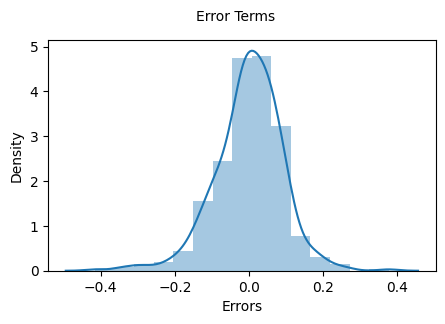

In [52]:
fig = plt.figure(figsize=(5,3))
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 10)                
plt.xlabel('Errors', fontsize = 10)        
plt.show()

__Observation : We see that the residuals are normally distributed with a mean 0 (which fulfills one of the major assumptions of linear regression).__

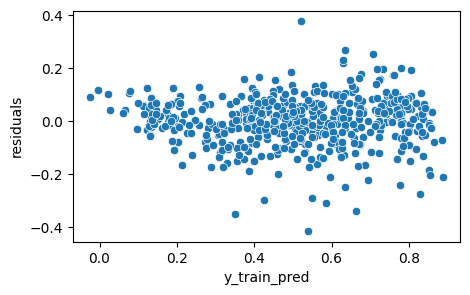

In [53]:
fig = plt.figure(figsize=(5,3))
sns.scatterplot(x = y_train_pred, y = res)
plt.xlabel("y_train_pred",fontsize=10)
plt.ylabel("residuals",fontsize=10)
plt.show()

__Observation : As seen from above scatterplot, Residuals are independent of each other i.e. they do not exhibit any pattern. Also we see that they have constant variance. This fulfills another two assumptions of LR. Thus our model is good for the final prediction and testing.__

## Model Evaluation

In [54]:
df_test.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_cloudy,weathersit_light-rain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [55]:
x_test = df_test.drop(columns=['cnt'])
y_test = df_test['cnt']

# Creating another dataframe by dropping variables from x_test
x_test = x_test[x_train.columns]

# Adding a constant variable 
x_testc = sm.add_constant(x_test)

In [56]:
# Making predictions
y_test_pred = lr.predict(x_testc)

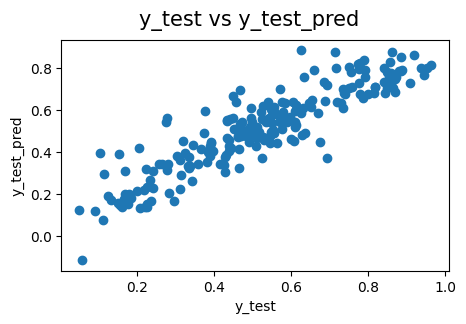

In [57]:
fig = plt.figure(figsize=(5,3))
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=15)              
plt.xlabel('y_test', fontsize=10)                       
plt.ylabel('y_test_pred', fontsize=10)
plt.show()

#### Checking the R-sq on the test set

In [58]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8071278592960879

__Observation : From the above scatter plot and a R-sq value of 0.8, we observe that our LR model is working well on the test data.__

## Analysis Summary
We have arrived at the final model (containing 10 variables) after few iterations where each iteration involved removal of variables with high p-value/VIF's. The final model was tested on the test data and was found to be performing well. Based on the final model,  following are the top 3 features contributing significantly towards explaining the demand of the shared bikes :
 - **temp** : As was also evident from the plots & correlation, temp is the feature with maximum impact on shared bikes demand.
 - **light-rain** : This is a dummy variable created from season and has a -ve coefficient. As expected as well, if it rains the bikes demand will go down. This behaviour is also seen from the bar-plot of weathersit against cnt.
 - **yr** : Since the bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' is a good variable for prediction.
